[[44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]]
[[-111.891 -111.891 -111.891 -111.891 -111.891 -111.891 -111.891 -111.891
  -111.891 -111.891 -111.891]
 [-111.691 -111.691 -111.691 -111.691 -111.691 -111.691 -111.691 -111.691
  -111.691 -111.691 -111.691]
 [-111.491 -111.491 -111.491 -111.491 -111.491 -111.491 -111.49

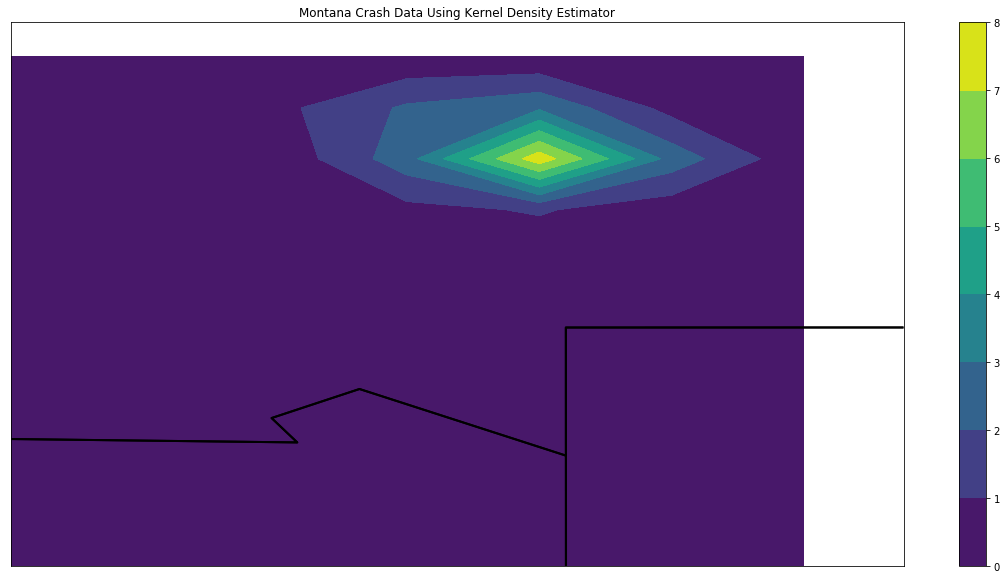

Done


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from pylab import *
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors.kde import KernelDensity
import random
import pandas as pd
import csv

from mpl_toolkits.basemap import Basemap
   
county='Gallatin_alldata'
lats, lons = [], []
with open('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'.csv') as f:
    reader = csv.reader(f)
    next(reader) # Ignore the header row.
    for row in reader:
        lat = float(row[15])
        lon = float(row[16])
        # filter lat,lons to (approximate) map view:
        lats.append(lat)
        lons.append(lon)
d = pd.read_csv('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'.csv')
    #Filter for events with locations. 
geolocated = d.dropna(subset = ['LATITUDE', 'LONGITUDE']) 

# Get matrices/arrays of species IDs and locations
#For Gallatin
min_lat =  44.06338
max_lat = 46.200085
min_lon = -111.891
max_lon = -110.5396
cmap = 'bwr'
n_neighbors = 20
res = .2

model = KernelDensity(kernel='gaussian', bandwidth = 0.1).fit(geolocated[['LATITUDE', 'LONGITUDE']])
#print(geolocated[['LATITUDE', 'LONGITUDE']])
x = np.arange(min_lat, max_lat, res)
y = np.arange(min_lon, max_lon, res)
X, Y = meshgrid(x, y)
numel = len(X) * len(X[0, :])


color_min = None
color_max = None
unraveled_x = X.reshape([numel, 1])
unraveled_y = Y.reshape([numel, 1])


data_to_eval = np.hstack([unraveled_x, unraveled_y])


temp=model.score_samples(data_to_eval)


density = np.exp(temp)
figure(figsize = [20, 10])    
m = Basemap(lon_0=-110.428794,lat_0=46.998846,llcrnrlat = min_lat, urcrnrlat = max_lat, llcrnrlon = min_lon, urcrnrlon=max_lon, resolution='l', fix_aspect = False)
density = density.reshape(X.shape)
print(X)
print(Y)

print("*************Density************")
print(density)

contourf(Y, X, density)
m.drawcoastlines(linewidth = 2)
m.drawcountries(linewidth = 2)
m.drawstates(linewidth = 2)
colorbar()
title("Montana Crash Data Using Kernel Density Estimator")
show()
#savefig('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/KDE'+county+'CrashData.jpg')
close()
print("Done")